Info

# Step 0: Import Lib

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Step 1: Load Data

In [5]:
df = pd.read_csv('Sesstion.csv')

In [6]:
df.head()
#df.columns

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,Athlete ID,injury,Date
0,1,5.8,0.0,0.6,1.2,0,0.00,0.11,0.00,0.18,0,0,0
1,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,1
2,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0,2
3,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,3
4,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,0,0,4


# Step 2: Cleaning Data

#####          A. Columns
1. Relace column it have the "." with "_" 
2. Relace column it have the " " with "_" 
3. Relace column it have the "-" with "_" 
4. Lower Case

In [7]:
df.columns = df.columns.str.replace( '.', '' ).str.replace( '/', '_' ).str.replace( '-', '_' ).str.replace( ' ', '_' ).str.lower().str.strip()

/tmp/ipykernel_6138/3642270442.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace( '.', '' ).str.replace( '/', '_' ).str.replace( '-', '_' ).str.replace( ' ', '_' ).str.lower().str.strip()


In [8]:
df.head()

,nr_sessions,total_km,km_z3_4,km_z5_t1_t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,athlete_id,injury,date
0,1,5.8,0.0,0.6,1.2,0,0.00,0.11,0.00,0.18,0,0,0
1,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,1
2,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0,2
3,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,3
4,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,0,0,4


#### B. Row (Cells)
1. There is No Null value in first view
2. When I check the type of data is compatible with columns
3. T

### I Dont use str.replace to my dataset becuse all Data is not Object only Intger and Float

In [9]:
df.isna().sum()

nr_sessions                  0
total_km                     0
km_z3_4                      0
km_z5_t1_t2                  0
km_sprinting                 0
strength_training            0
hours_alternative            0
perceived_exertion           0
perceived_trainingsuccess    0
perceived_recovery           0
athlete_id                   0
injury                       0
date                         0
dtype: int64

In [10]:
df.dtypes

nr_sessions                    int64
total_km                     float64
km_z3_4                      float64
km_z5_t1_t2                  float64
km_sprinting                 float64
strength_training              int64
hours_alternative            float64
perceived_exertion           float64
perceived_trainingsuccess    float64
perceived_recovery           float64
athlete_id                     int64
injury                         int64
date                           int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nr_sessions                42766 non-null  int64  
 1   total_km                   42766 non-null  float64
 2   km_z3_4                    42766 non-null  float64
 3   km_z5_t1_t2                42766 non-null  float64
 4   km_sprinting               42766 non-null  float64
 5   strength_training          42766 non-null  int64  
 6   hours_alternative          42766 non-null  float64
 7   perceived_exertion         42766 non-null  float64
 8   perceived_trainingsuccess  42766 non-null  float64
 9   perceived_recovery         42766 non-null  float64
 10  athlete_id                 42766 non-null  int64  
 11  injury                     42766 non-null  int64  
 12  date                       42766 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 4.2 MB


In [12]:
df.duplicated().sum()

0

# Setp 3: EDA

### The Target will by <font color='blue'>injury</font>

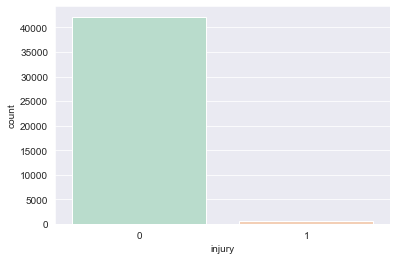

In [13]:
sns.set_style('darkgrid')
sns.countplot( x = 'injury', data = df, palette = 'Pastel2' );

In [14]:
df.describe()

,nr_sessions,total_km,km_z3_4,km_z5_t1_t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,athlete_id,injury,date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [15]:
df.injury.describe()

count    42766.000000
mean         0.013632
std          0.115960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: injury, dtype: float64

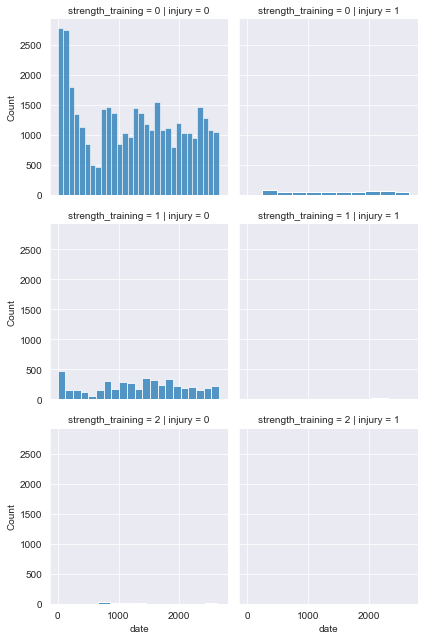

In [16]:
g = sns.FacetGrid(df, col='injury', row='strength_training')
g.map_dataframe(sns.histplot, x= 'date');

In [17]:
#df.duplicated().sum()
#df[col].nunique()
df['injury'].unique()
#df['strength_training'].unique()

array([0, 1])

# Step 4: Model

In [18]:
x=df.drop(columns=['injury']) 
y= df.injury

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10) 
lr_model = LogisticRegression() 
lr_model.fit(x_train, y_train) 
y_pred = lr_model.predict(x_test) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.00      0.00      0.00       119

    accuracy                           0.99      8554
   macro avg       0.49      0.50      0.50      8554
weighted avg       0.97      0.99      0.98      8554



/home/abdulwahab/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdulwahab/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abdulwahab/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWar

## For Test ## 
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
print('The Random Forest  Model R-Square {:.2f} %, MAPE is {:.2f} %' .format(r2_score(y_pred, y_test)*100, mean_absolute_percentage_error(y_test, y_pred)*100))


In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



Accuracy Score: 0.9729950900163666
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8435
           1       0.09      0.11      0.10       119

    accuracy                           0.97      8554
   macro avg       0.54      0.55      0.54      8554
weighted avg       0.97      0.97      0.97      8554

